# Insurance Risk Analytics: Exploratory Data Analysis (EDA)

This notebook performs a comprehensive Exploratory Data Analysis (EDA) on the insurance portfolio data. The goal is to gain a foundational understanding of the data, assess its quality, and uncover initial patterns related to risk and profitability.

## Project Structure Notes:
- `Data/`: Contains the raw input data (`MachineLearningRating_v3.txt`).
- `output_plots/`: This directory will be created to store all generated plots from this EDA.
- This notebook resides in the `notebooks/` directory.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- CONFIGURATION ---
# Define paths relative to the notebook's location (which is in the 'notebooks' folder)
# Data file is in ../Data/
INSURANCE_DATA_FILE = os.path.join('..', 'Data', 'MachineLearningRating_v3.txt')

# Output plots will be saved in ../output_plots/
OUTPUT_PLOTS_DIR = os.path.join('..', 'output_plots')

# Ensure the output directory exists
os.makedirs(OUTPUT_PLOTS_DIR, exist_ok=True)
print(f"Output plots will be saved to: {OUTPUT_PLOTS_DIR}")

# Set a style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100 # Adjust figure resolution for better quality

Output plots will be saved to: ..\output_plots


In [18]:
def load_and_preprocess_data(file_path):
    """
    Loads the insurance data and performs initial preprocessing.
    Assumes a pipe '|' delimited file.
    """
    try:
        df = pd.read_csv(file_path, sep='|', skipinitialspace=True, encoding='utf-8')
        print(f"Dataset '{file_path}' loaded successfully.")

        df.columns = df.columns.str.strip()

        if df.columns[0] == '':
            df = df.iloc[:, 1:]
            df.columns = df.columns.str.strip()

        if df.columns[-1] == '':
            df = df.iloc[:, :-1]
            df.columns = df.columns.str.strip()

        df = df.dropna(how='all')
        df = df.loc[:, df.columns.notna()]

        print("\nInitial DataFrame Info:")
        df.info()
        print("\nFirst 5 rows of raw data (after initial load):")
        print(df.head())

        if 'TransactionMonth' in df.columns:
            df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
            df.dropna(subset=['TransactionMonth'], inplace=True)
            print("\n'TransactionMonth' converted to datetime and invalid rows removed.")
        else:
            print("\n'TransactionMonth' column not found.")

        for col in ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']:
            if col in df.columns:
                df[col] = df[col].astype(str).str.replace(',', '', regex=False)
                df[col] = pd.to_numeric(df[col], errors='coerce')
                df[col] = df[col].fillna(0)
                print(f"'{col}' converted to numeric and NaNs filled with 0.")
            else:
                print(f"'{col}' column not found.")

        return df
    except FileNotFoundError:
        print(f"Error: {file_path} not found. Please ensure the file is in the correct directory.")
        return None
    except Exception as e:
        print(f"An error occurred during data loading or initial preprocessing: {e}")
        return None

In [19]:
def calculate_loss_ratio(df):
    """Calculates Loss Ratio (TotalClaims / TotalPremium) and handles division by zero."""
    if 'TotalClaims' in df.columns and 'TotalPremium' in df.columns:
        df['LossRatio'] = np.where(
            df['TotalPremium'] == 0,
            0,
            df['TotalClaims'] / df['TotalPremium']
        )
        print("\n'LossRatio' calculated (TotalClaims / TotalPremium). Handled division by zero.")
    else:
        print("\n'TotalClaims' or 'TotalPremium' not found. Cannot calculate Loss Ratio.")
    return df

In [20]:
def plot_distribution(df, column, title, xlabel, ylabel='Count', kind='hist', bins=20, rotation=0, save_path=None, plot_name=None):
    """Plots distribution for numerical or categorical columns and saves it."""
    plt.figure(figsize=(10, 6))
    if kind == 'hist':
        sns.histplot(df[column], kde=True, bins=bins)
    elif kind == 'bar':
        if not df[column].empty:
            sns.countplot(x=column, data=df, order=df[column].value_counts().index)
            plt.xticks(rotation=rotation)
        else:
            print(f"Cannot plot bar chart for {column}: column is empty.")
            plt.close()
            return
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    if save_path and plot_name:
        plt.savefig(os.path.join(save_path, plot_name))
        print(f"Saved plot: {plot_name} to {save_path}")
    plt.close()

In [21]:
def plot_box(df, column, title, ylabel, save_path=None, plot_name=None):
    """Plots a box plot for outlier detection and saves it."""
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    if save_path and plot_name:
        plt.savefig(os.path.join(save_path, plot_name))
        print(f"Saved plot: {plot_name} to {save_path}")
    plt.close()

## Exploratory Data Analysis (EDA)

This section performs the main EDA steps.

In [22]:
print("--- Starting Comprehensive EDA for Insurance Data ---")

# Load and preprocess data
df_insurance = load_and_preprocess_data(INSURANCE_DATA_FILE)

if df_insurance is None:
    print("Exiting due to data loading/preprocessing error.")
else:
    print("\nDataFrame Info (after initial preprocessing):")
    df_insurance.info()
    print("\nDescriptive statistics for numerical columns:")
    print(df_insurance.describe())
    print("\nMissing values after initial load and conversions:")
    print(df_insurance.isnull().sum())

--- Starting Comprehensive EDA for Insurance Data ---


C:\Users\eep\AppData\Local\Temp\ipykernel_29184\2997050676.py:7: DtypeWarning: Columns (4,32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='|', skipinitialspace=True, encoding='utf-8')


Dataset '..\Data\MachineLearningRating_v3.txt' loaded successfully.

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               104888 non-null   object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   obje

In [23]:
# Calculate Loss Ratio
df_insurance = calculate_loss_ratio(df_insurance)
if 'LossRatio' in df_insurance.columns:
    print("\nDescriptive statistics for Loss Ratio:")
    print(df_insurance['LossRatio'].describe())


'LossRatio' calculated (TotalClaims / TotalPremium). Handled division by zero.

Descriptive statistics for Loss Ratio:
count    1.000098e+06
mean     2.163699e-01
std      7.304735e+00
min     -1.870012e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.553600e+03
Name: LossRatio, dtype: float64


### 1. Overall Loss Ratio & Variation by Province, VehicleType, Gender

This section explores how the Loss Ratio (TotalClaims / TotalPremium) varies across different key categorical dimensions.

In [24]:
print("\n--- Loss Ratio Analysis ---")
if 'LossRatio' in df_insurance.columns and 'Province' in df_insurance.columns and not df_insurance['Province'].empty:
    loss_ratio_by_province = df_insurance.groupby('Province')['LossRatio'].mean().sort_values(ascending=False)
    print("\nAverage Loss Ratio by Province:")
    print(loss_ratio_by_province)

    plot_name = 'loss_ratio_by_province.png'
    plt.figure(figsize=(12, 7))
    sns.barplot(x=loss_ratio_by_province.index, y=loss_ratio_by_province.values, palette='coolwarm')
    plt.title('Average Loss Ratio by Province (Creative Plot 1)')
    plt.xlabel('Province')
    plt.ylabel('Average Loss Ratio')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_PLOTS_DIR, plot_name))
    print(f"Saved plot: {plot_name}")
    plt.close()
else:
    print("\nSkipping Loss Ratio by Province analysis: 'Province' or 'LossRatio' column missing or empty.")

if 'LossRatio' in df_insurance.columns and 'VehicleType' in df_insurance.columns and not df_insurance['VehicleType'].empty:
    loss_ratio_by_vehicle = df_insurance.groupby('VehicleType')['LossRatio'].mean().sort_values(ascending=False)
    print("\nAverage Loss Ratio by Vehicle Type:")
    print(loss_ratio_by_vehicle)

    plot_name = 'loss_ratio_by_vehicle_type.png'
    plt.figure(figsize=(10, 6))
    sns.barplot(x=loss_ratio_by_vehicle.index, y=loss_ratio_by_vehicle.values, palette='viridis')
    plt.title('Average Loss Ratio by Vehicle Type')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Average Loss Ratio')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_PLOTS_DIR, plot_name))
    print(f"Saved plot: {plot_name}")
    plt.close()
else:
    print("\nSkipping Loss Ratio by Vehicle Type analysis: 'VehicleType' or 'LossRatio' column missing or empty.")

if 'LossRatio' in df_insurance.columns and 'Gender' in df_insurance.columns and not df_insurance['Gender'].empty:
    loss_ratio_by_gender = df_insurance.groupby('Gender')['LossRatio'].mean().sort_values(ascending=False)
    print("\nAverage Loss Ratio by Gender:")
    print(loss_ratio_by_gender)

    plot_name = 'loss_ratio_by_gender.png'
    plt.figure(figsize=(8, 5))
    sns.barplot(x=loss_ratio_by_gender.index, y=loss_ratio_by_gender.values, palette='pastel')
    plt.title('Average Loss Ratio by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Average Loss Ratio')
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_PLOTS_DIR, plot_name))
    print(f"Saved plot: {plot_name}")
    plt.close()
else:
    print("\nSkipping Loss Ratio by Gender analysis: 'Gender' or 'LossRatio' column missing or empty.")


--- Loss Ratio Analysis ---

Average Loss Ratio by Province:
Province
Gauteng          0.262216
Limpopo          0.252857
Mpumalanga       0.235858
Western Cape     0.193640
North West       0.178830
KwaZulu-Natal    0.174868
Eastern Cape     0.152974
Northern Cape    0.116388
Free State       0.077792
Name: LossRatio, dtype: float64


C:\Users\eep\AppData\Local\Temp\ipykernel_29184\114317999.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loss_ratio_by_province.index, y=loss_ratio_by_province.values, palette='coolwarm')


Saved plot: loss_ratio_by_province.png

Average Loss Ratio by Vehicle Type:
VehicleType
Heavy Commercial     0.457233
Light Commercial     0.364845
Medium Commercial    0.305509
Passenger Vehicle    0.208682
Bus                  0.000000
Name: LossRatio, dtype: float64


C:\Users\eep\AppData\Local\Temp\ipykernel_29184\114317999.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loss_ratio_by_vehicle.index, y=loss_ratio_by_vehicle.values, palette='viridis')


Saved plot: loss_ratio_by_vehicle_type.png

Average Loss Ratio by Gender:
Gender
Female           0.247919
Not specified    0.218548
Male             0.157443
Name: LossRatio, dtype: float64
Saved plot: loss_ratio_by_gender.png


C:\Users\eep\AppData\Local\Temp\ipykernel_29184\114317999.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loss_ratio_by_gender.index, y=loss_ratio_by_gender.values, palette='pastel')


### 2. Distributions of Key Financial Variables & Outliers

This section analyzes the distribution of financial columns (`TotalPremium`, `TotalClaims`, `CustomValueEstimate`) and identifies potential outliers using histograms and box plots.

In [25]:
print("\n--- Distribution & Outlier Analysis of Financial Variables ---")
for col in ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']:
    if col in df_insurance.columns and not df_insurance[col].empty:
        plot_distribution(df_insurance, col, f'Distribution of {col}', col, kind='hist', save_path=OUTPUT_PLOTS_DIR, plot_name=f'distribution_{col}.png')
        plot_box(df_insurance, col, f'Box Plot of {col} (Outlier Detection)', col, save_path=OUTPUT_PLOTS_DIR, plot_name=f'boxplot_{col}.png')
        print(f"\nDescriptive statistics for {col}:")
        print(df_insurance[col].describe())
    else:
        print(f"\nSkipping analysis for '{col}': column missing or empty.")


--- Distribution & Outlier Analysis of Financial Variables ---
Saved plot: distribution_TotalPremium.png to ..\output_plots
Saved plot: boxplot_TotalPremium.png to ..\output_plots

Descriptive statistics for TotalPremium:
count    1.000098e+06
mean     6.190550e+01
std      2.302845e+02
min     -7.825768e+02
25%      0.000000e+00
50%      2.178333e+00
75%      2.192982e+01
max      6.528260e+04
Name: TotalPremium, dtype: float64
Saved plot: distribution_TotalClaims.png to ..\output_plots
Saved plot: boxplot_TotalClaims.png to ..\output_plots

Descriptive statistics for TotalClaims:
count    1.000098e+06
mean     6.486119e+01
std      2.384075e+03
min     -1.200241e+04
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.930921e+05
Name: TotalClaims, dtype: float64
Saved plot: distribution_CustomValueEstimate.png to ..\output_plots
Saved plot: boxplot_CustomValueEstimate.png to ..\output_plots

Descriptive statistics for CustomValueEstimate:
count    1.000098e+0

### 3. Temporal Trends

This section examines the claim frequency and severity over the 18-month period to identify any temporal patterns.

In [26]:
print("\n--- Temporal Trends ---")
if 'TransactionMonth' in df_insurance.columns and not df_insurance['TransactionMonth'].empty:
    df_insurance['MonthYear'] = df_insurance['TransactionMonth'].dt.to_period('M')
    if not df_insurance['MonthYear'].empty:
        monthly_claims = df_insurance.groupby('MonthYear')['TotalClaims'].sum()
        monthly_premiums = df_insurance.groupby('MonthYear')['TotalPremium'].sum()

        plot_name_claims_premium = 'monthly_claims_premium_trend.png'
        plt.figure(figsize=(15, 7))
        plt.plot(monthly_claims.index.astype(str), monthly_claims.values, marker='o', label='Total Claims')
        plt.plot(monthly_premiums.index.astype(str), monthly_premiums.values, marker='x', label='Total Premium')
        plt.title('Monthly Total Claims and Total Premium Over Time (Creative Plot 2)')
        plt.xlabel('Month-Year')
        plt.ylabel('Amount')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig(os.path.join(OUTPUT_PLOTS_DIR, plot_name_claims_premium))
        print(f"Saved plot: {plot_name_claims_premium}")
        plt.close()

        monthly_loss_ratio = df_insurance.groupby('MonthYear').apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].replace(0, np.nan).sum())
        monthly_loss_ratio = monthly_loss_ratio.fillna(0)

        plot_name_loss_ratio_trend = 'monthly_loss_ratio_trend.png'
        plt.figure(figsize=(15, 7))
        plt.plot(monthly_loss_ratio.index.astype(str), monthly_loss_ratio.values, marker='s', color='purple', label='Monthly Loss Ratio')
        plt.title('Monthly Loss Ratio Trend Over Time')
        plt.xlabel('Month-Year')
        plt.ylabel('Loss Ratio')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig(os.path.join(OUTPUT_PLOTS_DIR, plot_name_loss_ratio_trend))
        print(f"Saved plot: {plot_name_loss_ratio_trend}")
        plt.close()

    else:
        print("\nSkipping temporal trends: 'MonthYear' column is empty after conversion.")
else:
    print("\nSkipping temporal trends: 'TransactionMonth' column missing or empty.")


--- Temporal Trends ---
Saved plot: monthly_claims_premium_trend.png


C:\Users\eep\AppData\Local\Temp\ipykernel_29184\935418058.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_loss_ratio = df_insurance.groupby('MonthYear').apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].replace(0, np.nan).sum())


Saved plot: monthly_loss_ratio_trend.png


### 4. Vehicle Make/Model Claims Analysis

This section identifies vehicle makes and models associated with the highest and lowest claim amounts.

In [27]:
print("\n--- Vehicle Make/Model Claims Analysis ---")
if all(col in df_insurance.columns for col in ['make', 'Model', 'TotalClaims']) and not df_insurance[['make', 'Model', 'TotalClaims']].empty:
    claims_by_vehicle = df_insurance.groupby(['make', 'Model'])['TotalClaims'].sum().sort_values(ascending=False)
    print("\nTop 10 Vehicle Make/Models by Total Claims:")
    print(claims_by_vehicle.head(10))
    print("\nBottom 10 Vehicle Make/Models by Total Claims (excluding 0 claims for better insight):")
    print(claims_by_vehicle[claims_by_vehicle > 0].tail(10))

    claims_by_make = df_insurance.groupby('make')['TotalClaims'].sum().sort_values(ascending=False)
    top_10_makes = claims_by_make.head(10)
    if not top_10_makes.empty:
        plot_name_top_10_makes = 'top_10_vehicle_makes_claims.png'
        plt.figure(figsize=(12, 7))
        sns.barplot(x=top_10_makes.index, y=top_10_makes.values, palette='magma')
        plt.title('Top 10 Vehicle Makes by Total Claim Amount (Creative Plot 3)')
        plt.xlabel('Vehicle Make')
        plt.ylabel('Total Claim Amount')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.75)
        plt.tight_layout()
        plt.savefig(os.path.join(OUTPUT_PLOTS_DIR, plot_name_top_10_makes))
        print(f"Saved plot: {plot_name_top_10_makes}")
        plt.close()
    else:
        print("\nNot enough data to plot top 10 vehicle makes by claims.")
else:
    print("\nSkipping Vehicle Make/Model Claims analysis: Required columns missing or empty.")


--- Vehicle Make/Model Claims Analysis ---

Top 10 Vehicle Make/Models by Total Claims:
make           Model                           
TOYOTA         QUANTUM 2.7 SESFIKILE 16s           1.203750e+07
               QUANTUM 2.7 SESFIKILE 15s           1.151173e+07
               QUANTUM 2.7 SESFIKILE 14s           9.967764e+06
               QUANTUM 2.5 D-4D SESFIKILE 16s      7.733236e+06
               HiACE SUPER 16 F/Lift               3.275205e+06
               HiACE SIYAYA                        1.727756e+06
               QUANTUM 2.5 D-4D 14 SEAT            1.339541e+06
CMC            AMANDLA 2.2                         1.106007e+06
TOYOTA         AVANZA 1.5 SX                       1.089785e+06
MERCEDES-BENZ  SPRINTER 515 CDi HI-ROOF F/C P/V    8.874161e+05
Name: TotalClaims, dtype: float64

Bottom 10 Vehicle Make/Models by Total Claims (excluding 0 claims for better insight):
make                                 Model                         
MERCEDES-BENZ                    

C:\Users\eep\AppData\Local\Temp\ipykernel_29184\3569987393.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_makes.index, y=top_10_makes.values, palette='magma')


Saved plot: top_10_vehicle_makes_claims.png


### 5. Correlation Analysis: Monthly Changes by PostalCode

This section explores the correlation between monthly changes in Total Premium and Total Claims as a function of ZipCode (PostalCode).

In [32]:
print("\n--- Correlation Analysis: Monthly Changes by PostalCode ---")
if all(col in df_insurance.columns for col in ['TransactionMonth', 'TotalPremium', 'TotalClaims', 'PostalCode']) and not df_insurance[['TransactionMonth', 'TotalPremium', 'TotalClaims', 'PostalCode']].empty:
    monthly_zip_data = df_insurance.groupby(['PostalCode', 'TransactionMonth']).agg(
        MonthlyPremium=('TotalPremium', 'sum'),
        MonthlyClaims=('TotalClaims', 'sum')
    ).reset_index()

    monthly_zip_data['PremiumChange'] = monthly_zip_data.groupby('PostalCode')['MonthlyPremium'].diff()
    monthly_zip_data['ClaimsChange'] = monthly_zip_data.groupby('PostalCode')['MonthlyClaims'].diff()

    correlations = monthly_zip_data.groupby('PostalCode').apply(
        lambda x: x['PremiumChange'].corr(x['ClaimsChange']) if x[['PremiumChange', 'ClaimsChange']].dropna().shape[0] > 1 else np.nan
    ).dropna().sort_values(ascending=False)

    if not correlations.empty:
        print("\nCorrelation between Monthly Premium Change and Monthly Claims Change by PostalCode (Top 10):")
        print(correlations.head(10))
        print("\nCorrelation between Monthly Premium Change and Monthly Claims Change by PostalCode (Bottom 10):")
        print(correlations.tail(10))
    else:
        print("No significant monthly premium/claims change data for correlation analysis by PostalCode.")
else:
    print("\nSkipping Correlation Analysis by PostalCode: Required columns missing or empty.")


--- Correlation Analysis: Monthly Changes by PostalCode ---


d:\10academy\week_3_insurance_risk_analytics\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3063: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\10academy\week_3_insurance_risk_analytics\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3064: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
d:\10academy\week_3_insurance_risk_analytics\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3063: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\10academy\week_3_insurance_risk_analytics\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3064: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
d:\10academy\week_3_insurance_risk_analytics\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3063: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\10academy\week_3_insurance_risk_analytics\venv\Lib\site-packages\numpy\lib\_function_ba


Correlation between Monthly Premium Change and Monthly Claims Change by PostalCode (Top 10):
PostalCode
1748    0.998869
1426    0.811997
4091    0.776635
4027    0.776309
5500    0.774597
3651    0.774597
3815    0.772884
2066    0.749376
1700    0.721499
21      0.718255
dtype: float64

Correlation between Monthly Premium Change and Monthly Claims Change by PostalCode (Bottom 10):
PostalCode
7000   -0.531110
8001   -0.545014
3934   -0.547723
201    -0.583658
1949   -0.592340
4061   -0.597870
1824   -0.638580
9300   -0.707305
320    -0.724981
1424   -0.735271
dtype: float64


d:\10academy\week_3_insurance_risk_analytics\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3063: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\10academy\week_3_insurance_risk_analytics\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3064: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
d:\10academy\week_3_insurance_risk_analytics\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3063: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\10academy\week_3_insurance_risk_analytics\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3064: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
d:\10academy\week_3_insurance_risk_analytics\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3063: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\10academy\week_3_insurance_risk_analytics\venv\Lib\site-packages\numpy\lib\_function_ba

--- Key Insights and Main Plots ---

### 1. Average Loss Ratio by Province
This plot visually highlights which provinces exhibit higher or lower average loss ratios.
It helps identify geographical areas that are more or less profitable, guiding targeted risk assessment or marketing strategies.


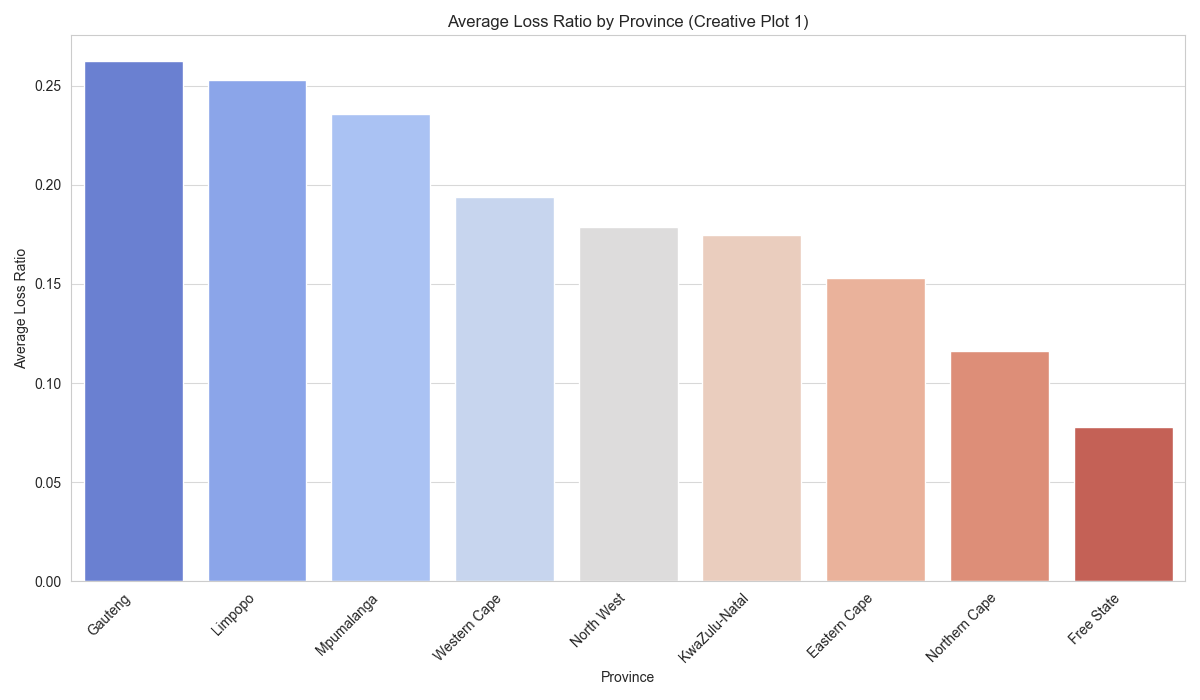


### 2. Monthly Total Claims and Total Premium Over Time
This plot showcases the temporal trends of both total claims and total premiums over the 18-month period.
It's crucial for identifying seasonal patterns, sudden spikes in claims, or discrepancies where claims grow faster than premiums, indicating potential profitability issues or shifts in risk.


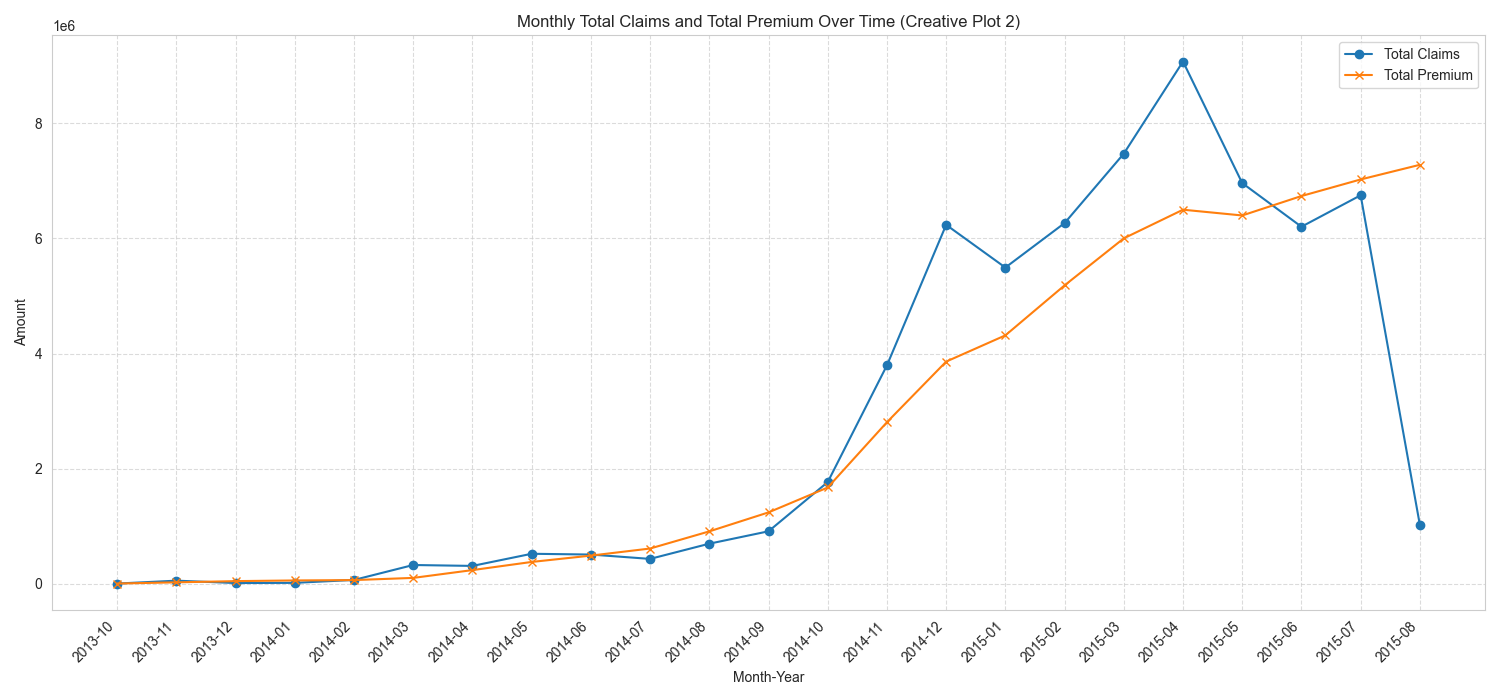


### 3. Top 10 Vehicle Makes by Total Claim Amount
This plot identifies the specific vehicle manufacturers that are associated with the highest cumulative claim amounts.
This insight is invaluable for underwriting adjustments, setting premium rates based on vehicle make, or focusing on high-risk vehicle types.


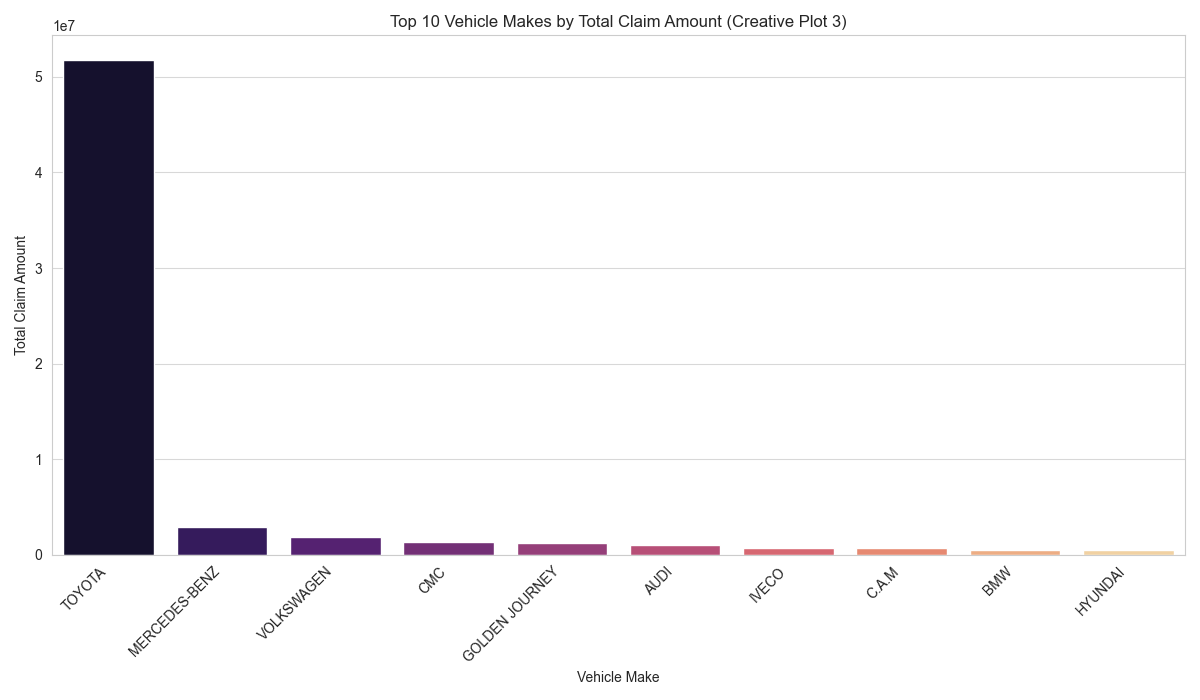

In [33]:
from IPython.display import Image, display
import os

# Define the path to your output_plots directory relative to the notebook
OUTPUT_PLOTS_DIR = os.path.join('..', 'output_plots')

print("--- Key Insights and Main Plots ---")

# Plot 1: Average Loss Ratio by Province
print("\n### 1. Average Loss Ratio by Province")
print("This plot visually highlights which provinces exhibit higher or lower average loss ratios.")
print("It helps identify geographical areas that are more or less profitable, guiding targeted risk assessment or marketing strategies.")
plot_path_1 = os.path.join(OUTPUT_PLOTS_DIR, 'loss_ratio_by_province.png')
if os.path.exists(plot_path_1):
    display(Image(filename=plot_path_1, width=800))
else:
    print(f"Plot not found: {plot_path_1}. Please ensure you have run all EDA cells first.")


# Plot 2: Monthly Total Claims and Total Premium Over Time
print("\n### 2. Monthly Total Claims and Total Premium Over Time")
print("This plot showcases the temporal trends of both total claims and total premiums over the 18-month period.")
print("It's crucial for identifying seasonal patterns, sudden spikes in claims, or discrepancies where claims grow faster than premiums, indicating potential profitability issues or shifts in risk.")
plot_path_2 = os.path.join(OUTPUT_PLOTS_DIR, 'monthly_claims_premium_trend.png')
if os.path.exists(plot_path_2):
    display(Image(filename=plot_path_2, width=900))
else:
    print(f"Plot not found: {plot_path_2}. Please ensure you have run all EDA cells first.")


# Plot 3: Top 10 Vehicle Makes by Total Claim Amount
print("\n### 3. Top 10 Vehicle Makes by Total Claim Amount")
print("This plot identifies the specific vehicle manufacturers that are associated with the highest cumulative claim amounts.")
print("This insight is invaluable for underwriting adjustments, setting premium rates based on vehicle make, or focusing on high-risk vehicle types.")
plot_path_3 = os.path.join(OUTPUT_PLOTS_DIR, 'top_10_vehicle_makes_claims.png')
if os.path.exists(plot_path_3):
    display(Image(filename=plot_path_3, width=800))
else:
    print(f"Plot not found: {plot_path_3}. Please ensure you have run all EDA cells first.")

## Conclusion

This EDA has provided foundational insights into the insurance data, including data quality, key distributions, temporal trends, and geographical variations in loss ratio and cover types. These insights can inform further analysis, modeling efforts, and strategic decision-making in insurance risk analytics.